# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [5]:
#import libraries to assist with data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:
#import warnings to get rid of large warning messages that take up unecessary space
import warnings

warnings.filterwarnings("ignore")

In [7]:
# Show file path of csv document
file_path = 'Wholesale_Data.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (440, 8)


In [8]:
# Check for missing data in the entire DataFrame
missing_data = df.isnull().sum()

# Display the number of missing values for each column, if any.
print("Missing Data:")
print(missing_data)

Missing Data:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [9]:
#Since none of the rows have missing data, we can move on to summary statistics
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000      

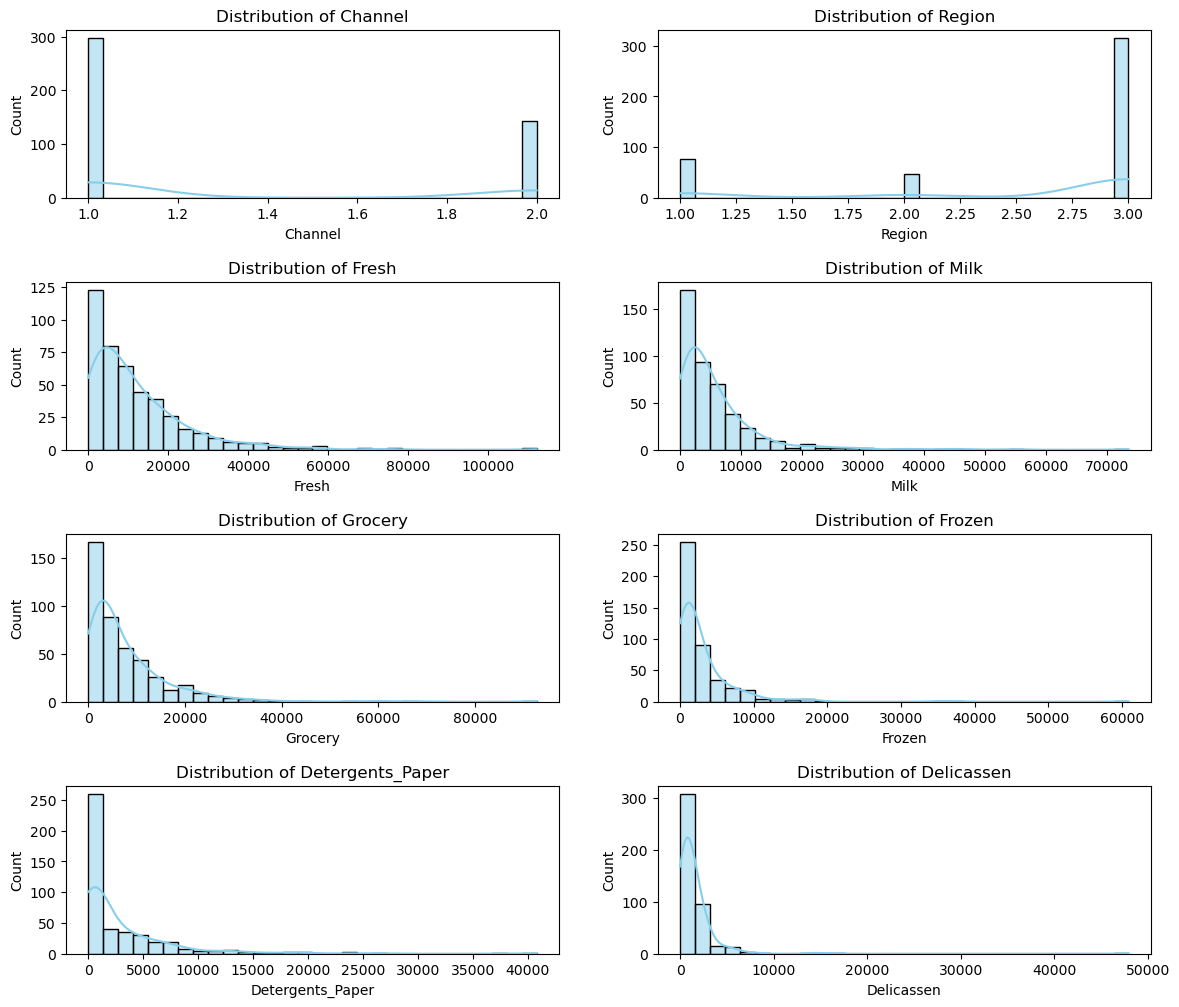

In [10]:
# Identify the figure and axes
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot histograms for each feature
for i, column in enumerate(df.columns):
    sns.histplot(df[column], ax=axes[i], kde=True, bins=30, color='skyblue')
    axes[i].set_title(f'Distribution of {column}')

plt.show()

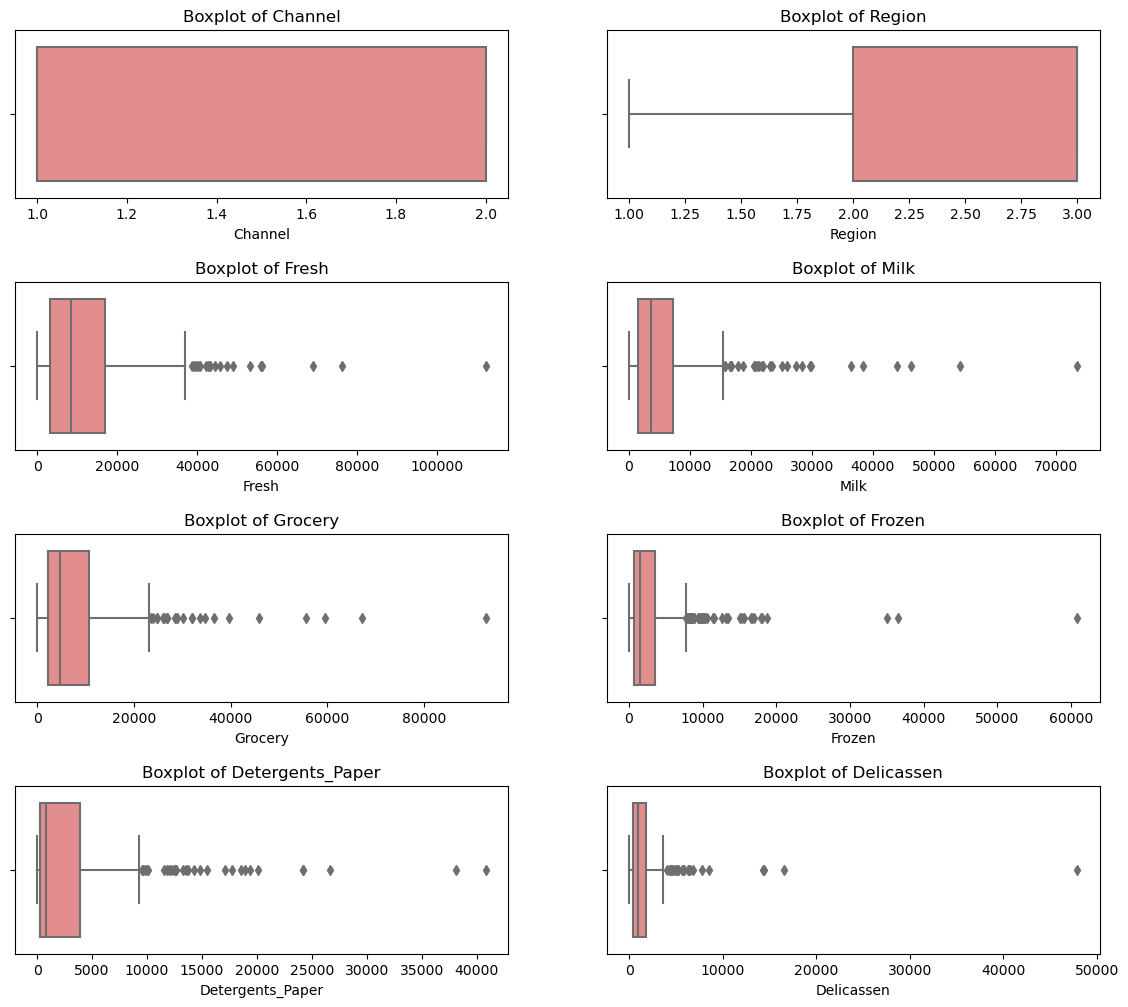

In [11]:
# Identify the figure and axes
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot boxplots for each feature
for i, column in enumerate(df.columns):
    sns.boxplot(x=df[column], ax=axes[i], color='lightcoral')
    axes[i].set_title(f'Boxplot of {column}')

plt.show()

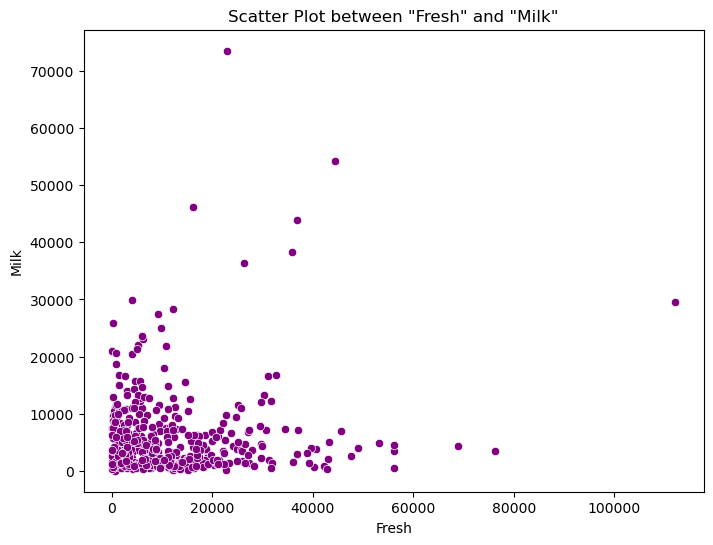

In [12]:
# Scatter plot between "Fresh" and "Milk" to determine relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fresh', y='Milk', data=df, color='purple')
plt.title('Scatter Plot between "Fresh" and "Milk"')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.show()

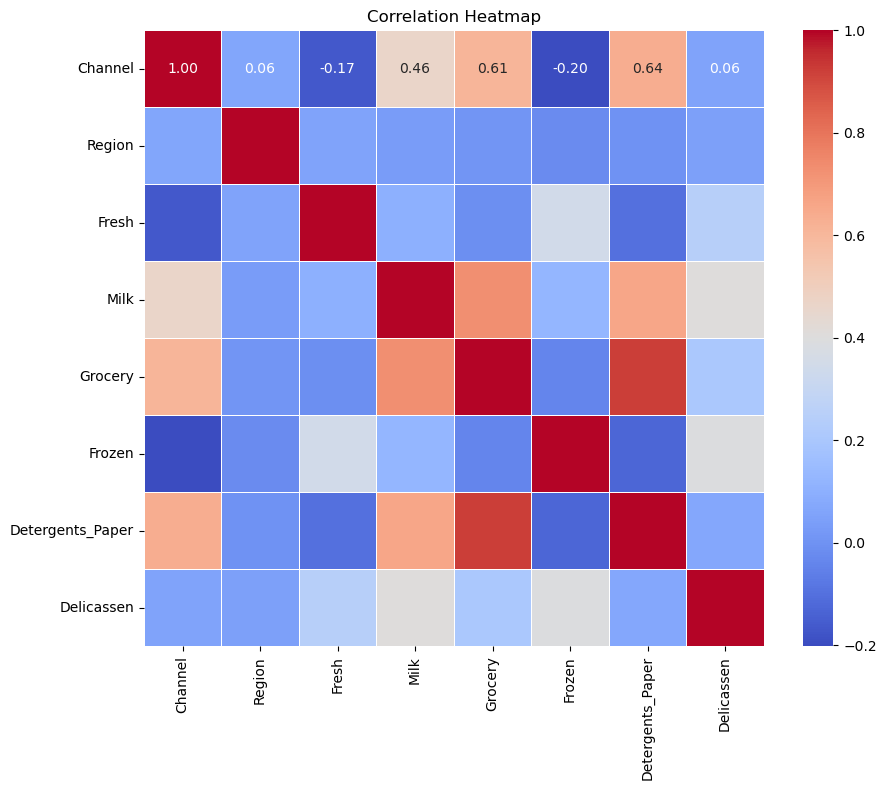

In [13]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Set up the figure and axes
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [36]:
# Group by 'Channel' and calculate the sum for each category
channel_spendings = df.groupby('Channel').sum()

# Display the result
print(channel_spendings)

         Region    Fresh     Milk  Grocery   Frozen  Detergents_Paper  \
Channel                                                                 
1           748  4015717  1028614  1180717  1116979            235587   
2           371  1264414  1521743  2317845   234671           1032270   

         Delicassen  Cluster  
Channel                       
1            421955      438  
2            248988      201  


In [37]:
# Find the category with the highest spending for each channel
max_category_per_channel = channel_spendings.idxmax(axis=1)

# Display the result
print(max_category_per_channel)

Channel
1      Fresh
2    Grocery
dtype: object


In [14]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Apply standardization to dataset 
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [16]:
from sklearn.ensemble import RandomForestRegressor

target_column = 'Channel'

# Separate features and target variable
X = df.drop(target_column, axis=1)  # Features
y = df[target_column]  # Target variable

# Create a Random Forest Regressor instance
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_regressor.fit(X, y)

# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
            Feature  Importance
5  Detergents_Paper    0.717046
3           Grocery    0.070712
2              Milk    0.068958
4            Frozen    0.050358
1             Fresh    0.042402
6        Delicassen    0.042179
0            Region    0.008346


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

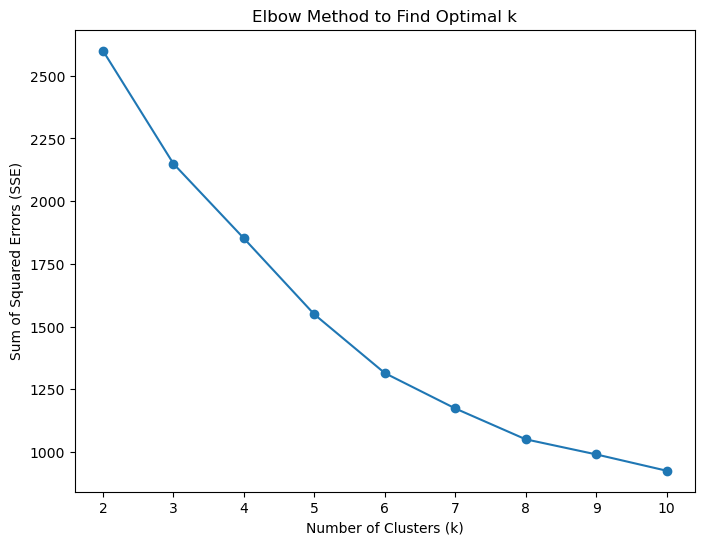

In [18]:
from sklearn.metrics import silhouette_score


# Step 1: Pre-process the dataset
# Standardize the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

df_scaled = pd.DataFrame(scaled_features, columns=df.columns)

# Step 2: Determine the optimal number of clusters (k)
# Use the Elbow Method or Silhouette Score to find the optimal k
# Elbow Method
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method to Find Optimal k')
plt.show()

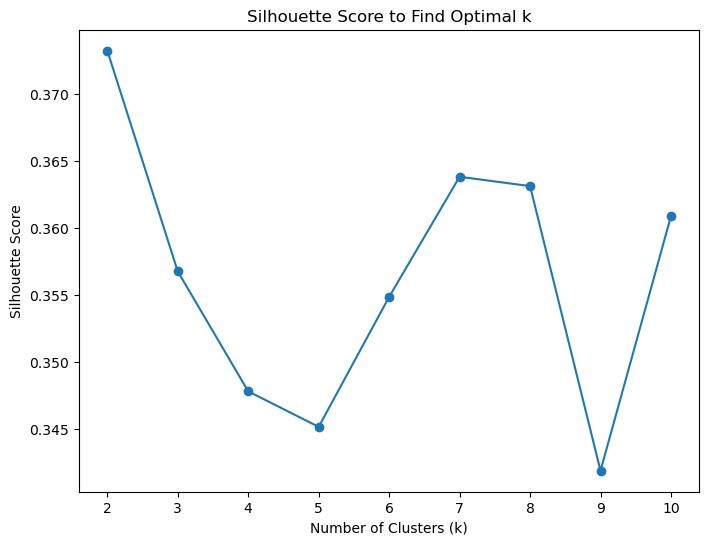

In [19]:
# Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Plot the Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score to Find Optimal k')
plt.show()

In [25]:
# Optimal k based on the Elbow Method 
optimal_k = 6

# Step 3: Initialize centroids and perform k-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

Cluster Centroids:
    Channel    Region         Fresh          Milk       Grocery        Frozen  \
0  1.000000  3.000000   9263.787709   2994.860335   3430.547486   2668.122905   
1  2.000000  2.672000   7762.856000   9173.568000  14341.768000   1376.256000   
2  1.000000  3.000000  36847.000000  43950.000000  20170.000000  36534.000000   
3  1.052632  2.763158  40361.210526   5254.342105   6012.000000   9306.078947   
4  1.057471  1.321839  10590.045977   3182.540230   4112.390805   3233.482759   
5  2.000000  2.500000  15964.900000  34708.500000  48536.900000   3054.600000   

   Detergents_Paper    Delicassen  
0        763.770950   1019.659218  
1       6163.592000   1659.128000  
2        239.000000  47943.000000  
3        965.947368   2849.631579  
4        862.022989   1096.275862  
5      24875.200000   2942.800000  


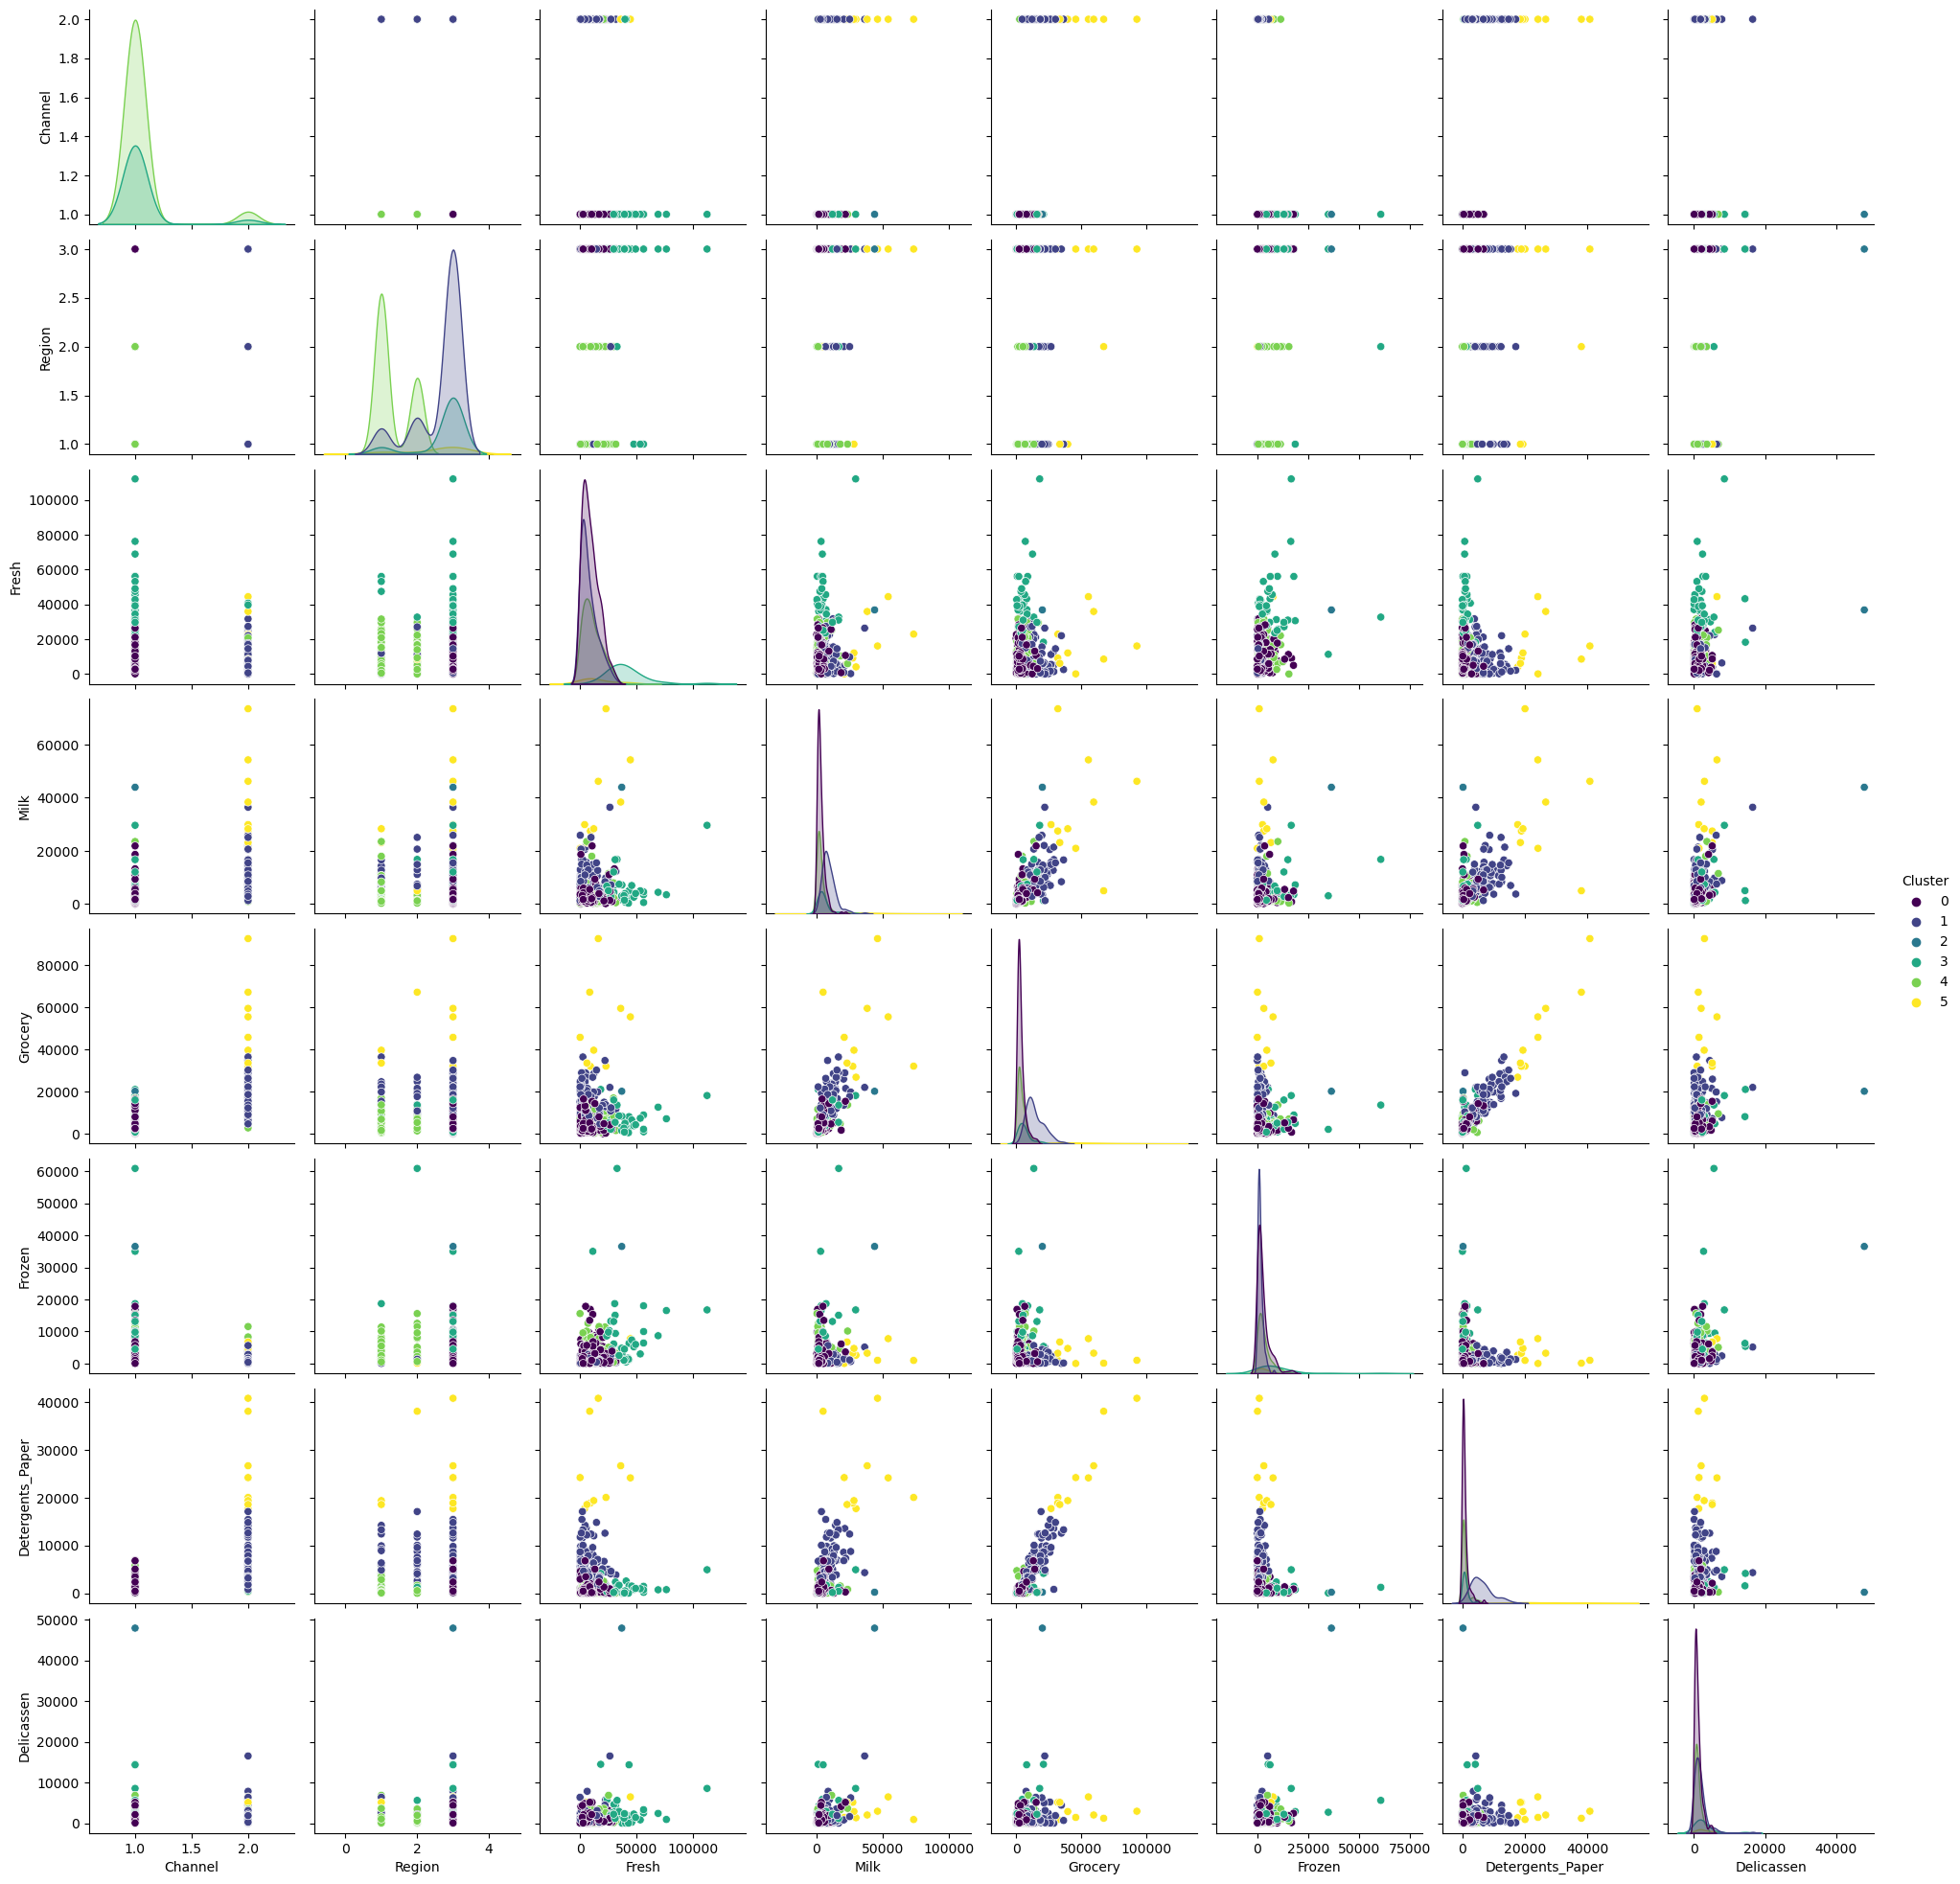

In [26]:
# Step 4: Analyze the clusters

# Display the centroid values for each cluster
cluster_centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df.columns[:-1])  # Exclude 'Cluster' column
print("Cluster Centroids:")
print(cluster_centroids)

# Visualize the clusters using pairplots or other visualizations
sns.pairplot(df, hue='Cluster', palette='viridis', diag_kind='kde')
plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

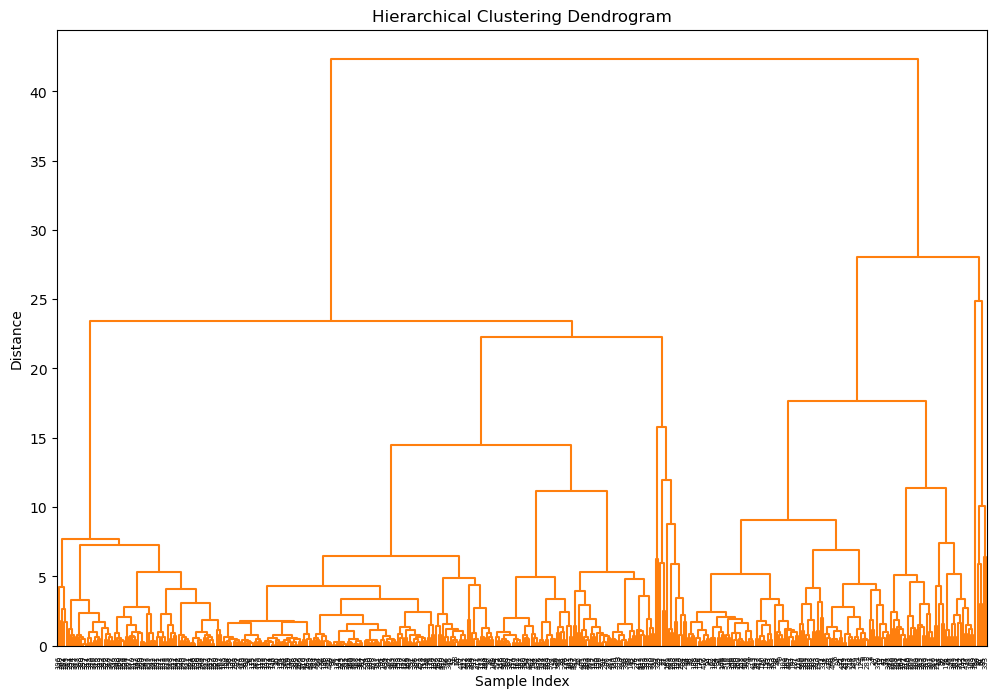

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Exclude 'Cluster' column
features_to_scale = df.columns[:-1]  # Exclude the last column ('Cluster')
scaled_features = scaler.fit_transform(df[features_to_scale])

# Create a DataFrame with scaled features
df_scaled = pd.DataFrame(scaled_features, columns=features_to_scale)

# Step 2: Create a linkage matrix using hierarchical clustering
linkage_matrix = linkage(df_scaled, method='ward')  # 'ward' linkage minimizes the variance between clusters

# Step 3: Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=df.index, orientation='top', leaf_rotation=90, color_threshold=80, above_threshold_color='gray')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [30]:
features = df.drop(['Cluster'], axis=1)  # Exclude unnecessary columns
target = df['Cluster'] 

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [31]:
from sklearn.decomposition import PCA

# Retain 95% of the variance
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

In [32]:
# Display the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Display the loadings of each original feature on each principal component
loadings = pca.components_
loadings_df = pd.DataFrame(data=loadings.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], index=features.columns)
print("Feature Loadings:")
print(loadings_df)

Explained Variance Ratio: [0.38750123 0.22374588 0.12647173 0.09229904 0.06957905 0.05741354]
Feature Loadings:
                       PC1       PC2       PC3       PC4       PC5       PC6
Channel           0.428292 -0.204699 -0.082980  0.029644 -0.036206 -0.863507
Region            0.024726  0.043130 -0.982501  0.077845  0.132509  0.089765
Fresh            -0.025319  0.513445 -0.088951 -0.798476 -0.258117 -0.147475
Milk              0.474410  0.205541  0.025751  0.054022 -0.072086  0.315933
Grocery           0.536329 -0.008718  0.045314 -0.121586  0.111730  0.213699
Frozen           -0.029975  0.592745  0.122157  0.161317  0.754212 -0.194360
Detergents_Paper  0.523906 -0.121083  0.047481 -0.151012  0.176503  0.195754
Delicassen        0.164997  0.533181 -0.000930  0.537558 -0.544827 -0.054533


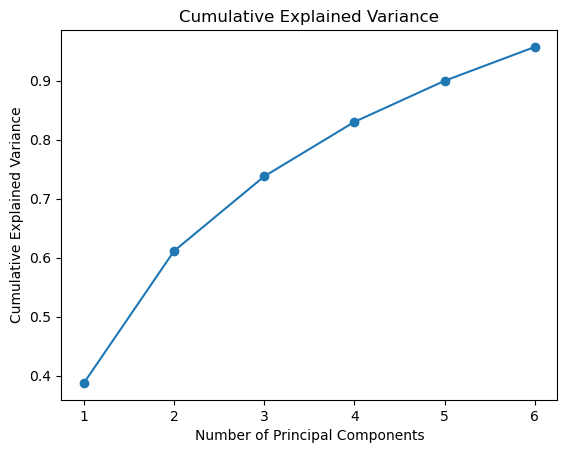

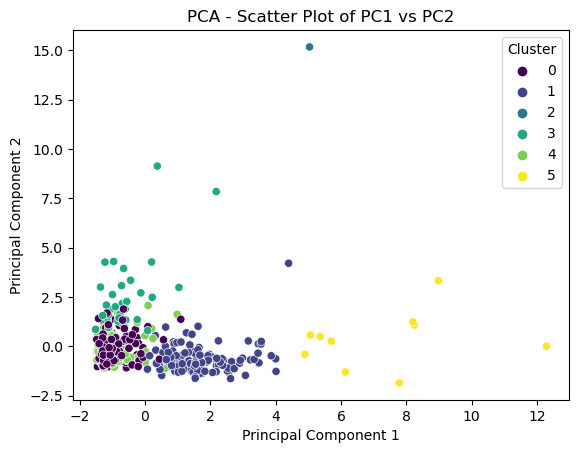

In [33]:
# Cumulative explained variance plot
cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Scatter plot of the first two principal components
sns.scatterplot(x='PC1', y='PC2', hue=target, data=pc_df, palette='viridis')
plt.title('PCA - Scatter Plot of PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

In [ ]:
# The strongest correlation is between channel, milk, grocery and detergents_paper
# Channel 1 spent the most on fresh while Channel 2 spent the most on groceries
# Using the elbow method, the optimal k was determined to be 6 which makes sense given the amount of categories there were for spending
# Unsupervised Learning allowed the realization of spending trends to gain insights into what is being purchased the most and where. It makes it easier to predict knowing which items are more stronly related 